# The Battle of Neighborhoods

## Introduction/Business Problem section 

### Introduction: my personal experience with Montreal
I came in 2015 in Montreal during 2 weeks for holydays. As a European guy, It was the first time (and the only) I had the opportunity to visit Canada, and especially this beautiful city.
<br>
Montreal represents for me a real multicultural city, modern and dynamic, with a lot of spots for arts, restaurants and tourism. The openness of this city and its people made me think many times about the advisability of starting a business in this place.
I will take the opportunity of this Capstone project to evaluate where this kind of project could be done in Montreal.

### Business Problem section
Be able to find the right place to open a new business is not an easy thing. Competitors and locations are important variables which need to be taken account before to start such a project. Data Science offers the possibility to make analysis and studies at the beginning of the project buidling; Open Data and algorithms can now help us to take the best decision.<br>
Our problematic is the following:
<blockquote>In which area of Montreal could be opened a French Restaurant?</blockquote>
Thanks to Foursquare API, to Open Data and to a clustering algorithm, the following study will propose acceptable areas to open a new restaurant (a French Restaurant) in Montreal.

### Target Audience
The target of this analysis is potential investors or people who want to start a new Business. Due to my nationality and the French culture of Montreal, the choice was done on "French Restaurant".
Banks involved in the business plan of such a project could also be interested by this Data Science analysis.

## Data Section

### Data Available
Open Data used come from the website https://donnees.montreal.ca<br>
The geographical coordinates used from this website concern the police posts in Montreal. These Data allow us to identify the main areas of this city and give us a representative view of the split of this city in term of human activities: these coordinates will give us the opportunity to check the venues around all over the city.<br> 
In a second steps, thanks to the Foursquare API, we will associate the venues related to these areas.

### Import needed Libraries and Modules

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


## Methodology

The Data used for this analysis regarding the city of Montreal come from two main differents Data sources : https://donnees.montreal.ca (directly available in .csv) and Foursquare (from the API) 

### 1. Import Open Data

In [4]:
df = pd.read_csv('https://montreal.l3.ckan.io/dataset/91f66001-b461-4f63-aff4-cddc0fe30ffe/resource/c9f296dd-596e-48ed-9c76-37230b2c916d/download/pdq_point.csv')

In [5]:
df.head(50)

,NO_CIV_LIE,PREFIX_TEM,NOM_TEMP,DIR_TEMP,MUN_TEMP,DESC_LIEU,Longitude,Latitude
0,4139,BOUL,SOURCES DES,NaN,DDO,POSTE DE QUARTIER 4,-73.807304,45.494380
1,8930,BOUL,PIE-IX,NaN,MTL,POSTE DE QUARTIER 30,-73.617433,45.577744
2,4555,RUE,HOCHELAGA,NaN,MTL,POSTE DE QUARTIER 23,-73.545915,45.556866
3,11756,BOUL,O'BRIEN,NaN,MTL,POSTE DE QUARTIER 10,-73.701029,45.528543
4,1435,AVEN,VAN-HORNE,NaN,OUT,POSTE DE QUARTIER 24,-73.615612,45.520110
5,6100,BOUL,HENRI-BOURASSA,NaN,MTN,POSTE DE QUARTIER 39,-73.615625,45.607724
6,395,BOUL,ST-JEAN,NaN,PCL,POSTE DE QUARTIER 5,-73.815898,45.447884
7,21,STRE,STANTON,NaN,WES,POSTE DE QUARTIER 12,-73.598654,45.486402
8,1625,AVEN,EGLISE DE L',NaN,MTL,POSTE DE QUARTIER 15,-73.584956,45.463718
9,1498,BOUL,ST-JEAN-BAPTISTE,NaN,MTL,POSTE DE QUARTIER 49,-73.505430,45.641616


### 2. Data Cleaning

In [112]:
New_df = df.rename(columns = {'NOM_TEMP': 'Area'})
New_df.head()

,NO_CIV_LIE,PREFIX_TEM,Area,DIR_TEMP,MUN_TEMP,DESC_LIEU,Longitude,Latitude
0,4139,BOUL,SOURCES DES,NaN,DDO,POSTE DE QUARTIER 4,-73.807304,45.494380
1,8930,BOUL,PIE-IX,NaN,MTL,POSTE DE QUARTIER 30,-73.617433,45.577744
2,4555,RUE,HOCHELAGA,NaN,MTL,POSTE DE QUARTIER 23,-73.545915,45.556866
3,11756,BOUL,O'BRIEN,NaN,MTL,POSTE DE QUARTIER 10,-73.701029,45.528543
4,1435,AVEN,VAN-HORNE,NaN,OUT,POSTE DE QUARTIER 24,-73.615612,45.520110


### 3. Storage of Montreal coordinates

In [7]:
Montreal_Lat = 45.508888
Montreal_Long= -73.561668

### 4. Creation of the map of Montreal to display the geographical areas

In [98]:
# create map of Montreal using latitude and longitude values above:
Montreal_map = folium.Map(location=[Montreal_Lat, Montreal_Long], zoom_start=11)

# add markers to map
for lat, lng, label in zip(New_df['Latitude'], New_df['Longitude'], New_df['Area']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Montreal_map)  
    
Montreal_map

###  5. Foursquare Credentials - Hidden

In [145]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


### 6. Creation of a function to explore all the areas in Montreal through Foursquare API

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000, LIMIT = 10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### 7. Use of this function on each neighborhood and create a new dataframe called Montreal_venues.

In [99]:
Montreal_venues = getNearbyVenues(names=New_df['Area'],
                                   latitudes=New_df['Latitude'],
                                   longitudes=New_df['Longitude']
                                  )

SOURCES DES
PIE-IX
HOCHELAGA
O'BRIEN
VAN-HORNE
HENRI-BOURASSA
ST-JEAN
STANTON
EGLISE DE L'
ST-JEAN-BAPTISTE
BELANGER
GRENET
ST-CHARLES
15E
JOSEPH-RENAUD
WESTMINSTER
STE-ELISABETH
RACHEL
LASALLE
PAPINEAU
MOLSON
FLEURY
WILLIBRORD
BEAUMONT
SOMERLED
PIERREFONDS DE
MAURICE-DUPLESSIS
ST-LAURENT
STE-CATHERINE
SHERBROOKE
LACORDAIRE
MOUNTAIN SIGHTS


In [20]:
print(Montreal_venues.shape)
Montreal_venues.head()

(3166, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,SOURCES DES,45.49438,-73.807304,Buzzfit gym,45.489056,-73.802799,Gym
1,SOURCES DES,45.49438,-73.807304,Centennial Park,45.485798,-73.809582,Park
2,SOURCES DES,45.49438,-73.807304,Marché de l'Ouest,45.484465,-73.802978,Shopping Mall
3,SOURCES DES,45.49438,-73.807304,Chateau Kebab,45.502341,-73.815488,Middle Eastern Restaurant
4,SOURCES DES,45.49438,-73.807304,Mansfield athletique - Pointe-Claire,45.481057,-73.797980,Gym


### 8. Analyze Each Neighborhood, display the existing Categories (venues)

In [100]:
# one hot encoding
Montreal_onehot = pd.get_dummies(Montreal_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Montreal_onehot['Neighborhood'] = Montreal_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Montreal_onehot.columns[-1]] + list(Montreal_onehot.columns[:-1])
Montreal_onehot = Montreal_onehot[fixed_columns]

Montreal_onehot.head()

,Neighborhood,Airport,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Store,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Café,Canal,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Coffee Shop,College Gym,Comedy Club,Community Center,Concert Hall,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Electronics Store,English Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,Hobby Shop,Hockey Arena,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Island,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kitchen Supply Store,Korean Restaurant,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Office,Outdoor Sculpture,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Pharmacy,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Print Shop,Pub,Record Shop,Recreation Center,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Soccer Field,Soccer Stadium,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Yoga Studio,Zoo
0,SOURCES DES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,SOURCES DES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,SOURCES DES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,SOURCES DES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,SOURCES DES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 9. Grouping of rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [101]:
Montreal_grouped = Montreal_onehot.groupby('Neighborhood').mean().reset_index()
Montreal_grouped

,Neighborhood,Airport,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Store,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Café,Canal,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Coffee Shop,College Gym,Comedy Club,Community Center,Concert Hall,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Electronics Store,English Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,Hobby Shop,Hockey Arena,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Island,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kitchen Supply Store,Korean Restaurant,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Office,Outdoor Sculpture,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Pharmacy,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Print Shop,Pub,Record Shop,Recreation Center,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Soccer Field,Soccer Stadium,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Yoga Studio,Zoo
0,15E,0.000000,0.000000,0.010000,0.00,0.00,0.02,0.00,0.00,0.01,0.010000,0.04,0.000000,0.02,0.01,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.020000,0.01,0.010000,0.080000,0.01,0.01,0.02,0.00,0.000000,0.00,0.00,0.01,0.000000,0.01,0.010000,0.00,0.00,0.00,0.00,0.000000,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.020000,0.00,0.00,0.000000,0.01,0.00,0.00,0.02,0.00,0.01,0.00,0.01,0.000000,0.000000,0.01,0.000000,0.00,0.000000,0.030000,0.030000,0.01,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.030000,0.010000,0.00,0.000000,0.010000,0.00,0.01,0.00,0.01,0.00,0.03,0.01,0.01,0.02,0.01,0.01,0.00,0.00,0.02,0.000000,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.090000,0.00,0.00,0.000000,0.000000,0.030000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.010000,0.00,0.00,0.050000,0.01,0.00,0.000000,0.01,0.01,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.010000,0.00,0.00,0.01,0.000000,0.00,0.00,0.00,0.000000,0.01,0.010000,0.000000,0.01,0.010000,0.00
1,BEAUMONT,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.01,0.020000,0.10,0.000000,0.03,0.02,0.00,0.00,0.010000,0.00,0.00,0.00,0.00,0.010000,0.01,0.020000,0.170000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.010000,0.01,0.000000,0.00,0.00,0.00,0.00,0.010000,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.05,0.00,0.01,0.00,0.00,0.000000,0.010000,0.00,0.000000,0.01,0.000000,0.020000,0.010000,0.00,0.00,0.00,0.00,0.010000,0.00,0.00,0.00,0.00,0.00,0.040000,0.000000,0.01,0.000000,0.010000,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.010000,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.070000,0.01,0.00,0.000000,0.000000,0.010000,0.00,0.00,0.00,0.00,0.00,0.030000,0.00,0.010000,0.00,0.00,0.030000,0.00,0.00,0.020000,0.01,0.01,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.000000,0.01,0

### 10.	Identification of the “French Restaurant” category

In [93]:
len(Montreal_grouped[Montreal_grouped["French Restaurant"] > 0])

27

### 11. In the current Dataframe, we keep only the "French Restaurant" category

In [103]:
Montreal_grouped= Montreal_grouped[["Neighborhood","French Restaurant",]]
Montreal_grouped.head()

,Neighborhood,French Restaurant
0,15E,0.02
1,BEAUMONT,0.05
2,BELANGER,0.04
3,EGLISE DE L',0.02
4,FLEURY,0.05


### 12. *k*-means: Find the right value of "K" (Elbow method)

In [104]:
Montreal_grouped2 = Montreal_grouped.drop('Neighborhood', 1)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


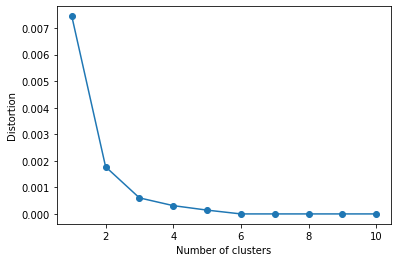

In [86]:
import matplotlib.pyplot as plt

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(Montreal_grouped2)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### 13. Run *k*-means to cluster the neighborhood into 3 clusters.

In [123]:
Montreal_grouped.head()

,Neighborhood,French Restaurant
0,15E,0.02
1,BEAUMONT,0.05
2,BELANGER,0.04
3,EGLISE DE L',0.02
4,FLEURY,0.05


In [135]:
# set number of clusters
kclusters = 3

Montreal_grouped_clustering = Montreal_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Montreal_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 2, 0, 2, 2, 0, 0, 0, 0])

### 14. Create a new dataframe that includes the cluster as well as the coordinates for each neighborhood / area

In [142]:
# add clustering labels
Montreal_merged = Montreal_grouped.copy()
Montreal_merged.insert(0, 'Cluster Labels', kmeans.labels_)
Montreal_merged

#Data Cleaning to initial Dataframe to keep only "Area" & "Lat / Long"
Montreal_Coord=New_df.copy()
Montreal_Coord=Montreal_Coord[["Area","Longitude","Latitude"]]

Montreal_merged = Montreal_merged.join(Montreal_Coord.set_index('Area'), on='Neighborhood')
Montreal_merged.head()


,Cluster Labels,Neighborhood,French Restaurant,Longitude,Latitude
0,0,15E,0.02,-73.677139,45.434420
1,2,BEAUMONT,0.05,-73.619494,45.526953
2,2,BELANGER,0.04,-73.609097,45.539766
3,0,EGLISE DE L',0.02,-73.584956,45.463718
4,2,FLEURY,0.05,-73.653616,45.568579


### 15. Data Visualization on a map of these 3 Clusters

In [143]:
# create map
map_clusters = folium.Map(location=[Montreal_Lat, Montreal_Long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Montreal_merged['Latitude'], Montreal_merged['Longitude'], Montreal_merged['Neighborhood'], Montreal_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 16.	Cluster Analysis (Ranking and detail of each Cluster)

In [144]:
# Sort the results by Cluster Labels
print(Montreal_merged.shape)
Montreal_merged.sort_values(["Cluster Labels"], inplace=True)
Montreal_merged.to_csv(r'C:\Users\User\Documents\Data Science IBM Certificate\Module 9\Final_Result.csv')
Montreal_merged

(32, 5)


,Cluster Labels,Neighborhood,French Restaurant,Longitude,Latitude
0,0,15E,0.02,-73.677139,45.434420
26,0,STANTON,0.03,-73.598654,45.486402
20,0,SOMERLED,0.03,-73.635499,45.471151
19,0,SHERBROOKE,0.03,-73.542385,45.583391
30,0,WESTMINSTER,0.03,-73.662142,45.459790
12,0,MOLSON,0.03,-73.569286,45.542359
9,0,LACORDAIRE,0.03,-73.594125,45.585329
8,0,JOSEPH-RENAUD,0.02,-73.552990,45.605040
31,0,WILLIBRORD,0.02,-73.573352,45.459231
6,0,HENRI-BOURASSA,0.02,-73.615625,45.607724


#### Cluster 0 ==> 1st Cluster

In [139]:
Montreal_merged.loc[Montreal_merged['Cluster Labels'] == 0]

,Cluster Labels,Neighborhood,French Restaurant,Longitude,Latitude
0,0,15E,0.02,-73.677139,45.434420
26,0,STANTON,0.03,-73.598654,45.486402
20,0,SOMERLED,0.03,-73.635499,45.471151
19,0,SHERBROOKE,0.03,-73.542385,45.583391
30,0,WESTMINSTER,0.03,-73.662142,45.459790
12,0,MOLSON,0.03,-73.569286,45.542359
9,0,LACORDAIRE,0.03,-73.594125,45.585329
8,0,JOSEPH-RENAUD,0.02,-73.552990,45.605040
31,0,WILLIBRORD,0.02,-73.573352,45.459231
6,0,HENRI-BOURASSA,0.02,-73.615625,45.607724


#### Cluster 1 ==> 2nd Cluster

In [140]:
Montreal_merged.loc[Montreal_merged['Cluster Labels'] == 1]

,Cluster Labels,Neighborhood,French Restaurant,Longitude,Latitude
10,1,LASALLE,0.01,-73.621666,45.415509
11,1,MAURICE-DUPLESSIS,0.01,-73.586439,45.633311
17,1,PIERREFONDS DE,0.00,-73.857175,45.486132
24,1,ST-JEAN-BAPTISTE,0.00,-73.505430,45.641616
21,1,SOURCES DES,0.00,-73.807304,45.494380
22,1,ST-CHARLES,0.00,-73.852292,45.447331
23,1,ST-JEAN,0.00,-73.815898,45.447884


#### Cluster 2 ==> 3rd Cluster

In [141]:
Montreal_merged.loc[Montreal_merged['Cluster Labels'] == 2]

,Cluster Labels,Neighborhood,French Restaurant,Longitude,Latitude
29,2,VAN-HORNE,0.04,-73.615612,45.520110
28,2,STE-ELISABETH,0.04,-73.560134,45.511242
27,2,STE-CATHERINE,0.04,-73.576534,45.496125
1,2,BEAUMONT,0.05,-73.619494,45.526953
25,2,ST-LAURENT,0.04,-73.628856,45.537745
2,2,BELANGER,0.04,-73.609097,45.539766
16,2,PIE-IX,0.04,-73.617433,45.577744
4,2,FLEURY,0.05,-73.653616,45.568579
14,2,O'BRIEN,0.04,-73.701029,45.528543
13,2,MOUNTAIN SIGHTS,0.04,-73.651645,45.496107
